<a href="https://colab.research.google.com/github/remizah/CognoRise_DataScience_Internship/blob/main/CognoRise_DS_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [21]:

# Load the dataset
df = pd.read_csv('/content/cinemaTicket_Ref.csv')


In [22]:

# Explore the dataset
print(df.head())
print(df.info())


   film_code  cinema_code  total_sales  tickets_sold  tickets_out  show_time  \
0       1492          304      3900000            26            0          4   
1       1492          352      3360000            42            0          5   
2       1492          489      2560000            32            0          4   
3       1492          429      1200000            12            0          1   
4       1492          524      1200000            15            0          3   

   occu_perc  ticket_price  ticket_use    capacity        date  month  \
0       4.26      150000.0          26  610.328638  2018-05-05      5   
1       8.08       80000.0          42  519.801980  2018-05-05      5   
2      20.00       80000.0          32  160.000000  2018-05-05      5   
3      11.01      100000.0          12  108.991826  2018-05-05      5   
4      16.67       80000.0          15   89.982004  2018-05-05      5   

   quarter  day  
0        2    5  
1        2    5  
2        2    5  
3       

In [23]:

# Check for missing values
print(df.isnull().sum())


film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
dtype: int64


In [24]:

# Handle missing values by filling with mean for numerical columns
df['occu_perc'].fillna(df['occu_perc'].mean(), inplace=True)
df['capacity'].fillna(df['capacity'].mean(), inplace=True)


In [25]:

# Verify that there are no missing values
print(df.isnull().sum())


film_code       0
cinema_code     0
total_sales     0
tickets_sold    0
tickets_out     0
show_time       0
occu_perc       0
ticket_price    0
ticket_use      0
capacity        0
date            0
month           0
quarter         0
day             0
dtype: int64


In [26]:

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Create additional time features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['dayofweek'] = df['date'].dt.dayofweek
df['weekofyear'] = df['date'].dt.isocalendar().week

# Encode categorical variables
categorical_cols = ['film_code', 'cinema_code']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)



In [27]:

# Feature and target variable
X = df.drop(['total_sales', 'date'], axis=1)
y = df['total_sales']


In [28]:

# Standardize the feature variables
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [29]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [16]:

# Make predictions
y_pred = model.predict(X_test)


In [17]:

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")


Mean Absolute Error: 87511.56741227854
Mean Squared Error: 1787320291153.7358
Root Mean Squared Error: 1336906.9867248565
R^2 Score: 0.9982079557266638


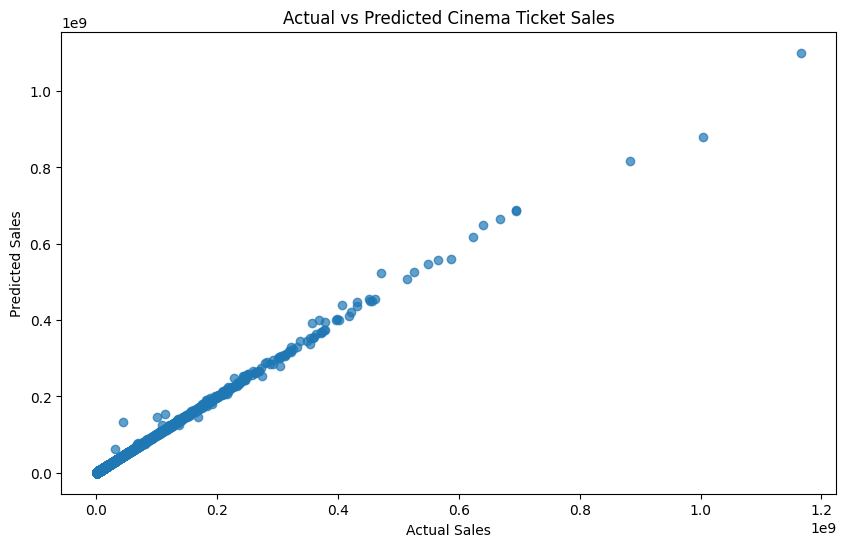

In [18]:

# Plot actual vs predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Cinema Ticket Sales')
plt.show()


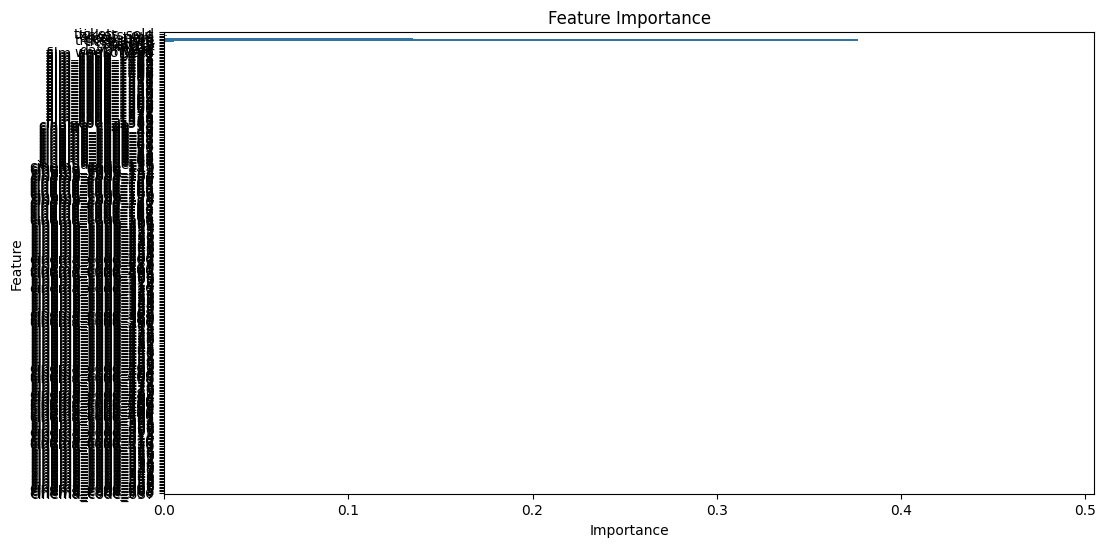

In [19]:

# Feature Importance
importance = model.feature_importances_
features = df.drop(['total_sales', 'date'], axis=1).columns

plt.figure(figsize=(12, 6))
sns.barplot(x=importance, y=features)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()